# SVM

## 1.SVM 개념이해

### (1) import

In [2]:
#라이브러리들을 불러오자.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons, make_classification

from sklearn.svm import SVC

import warnings    # 경고메시지 제외
warnings.filterwarnings(action='ignore')

### (2) 함수 생성

* svm 모델을 시각화 하는 함수를 생성해 봅시다.

In [3]:
def svm_visualize(x, y, model, title = "") :

    xx, yy = np.meshgrid(np.linspace(x[:,0].min(), x[:,0].max(), 50), 
                         np.linspace(x[:,1].min(), x[:,1].max(), 50)) # mesh grid

    # 메쉬 그리드값에 대해 모델 부터 거리 값 만들기.
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # 그래프 그리기
    plt.figure(figsize=(6, 6))
    # 데이터 산점도
    sns.scatterplot(x=x[:,0], y=x[:,1], hue=y)
    # levels= 0 모델 ,  -1, 1 은 마진 경계
    plt.contour(xx, yy, Z, levels=[-1, 0, 1], colors = 'gray',linestyles  = ['--','-','--'])
    plt.title(title)
    plt.axis("tight")
    plt.show()

### (3) 샘플데이터 생성

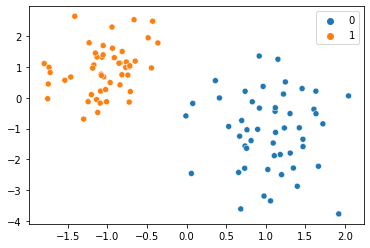

In [5]:
seed = 8

x, y = make_classification(n_samples=100,
                        n_features=2, 
                        n_redundant=0, 
                        weights = [0.5, 0.5],  # class 0과 1의 비율 조정 ==> class imbalance 상황만들기
                        n_clusters_per_class=1, 
                        random_state=seed)
sns.scatterplot(x[:,0], x[:,1], hue = y)
plt.show()

### (4) SVM 모델 생성 및 시각화

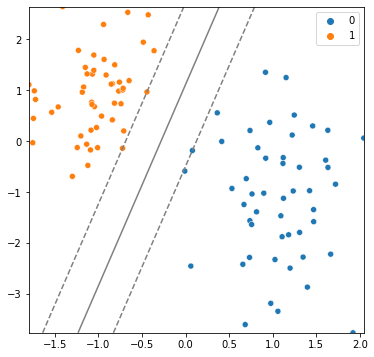

In [4]:
model = SVC(kernel = 'linear', C = 10)
model.fit(x,y)
svm_visualize(x, y, model)

### (5) 결정 경계와 마진

* 새로운 샘플 데이터를 다시 생성해 봅시다.

In [6]:
seed = 34
x, y = make_classification(n_features=2, n_redundant=0, weights = [0.5, 0.5],
                        n_clusters_per_class=1, random_state=seed)

* cost 값을 0.1, ~ 20 사이의 숫자로 변경하며 cost에 따른 모델을 살펴 봅시다.

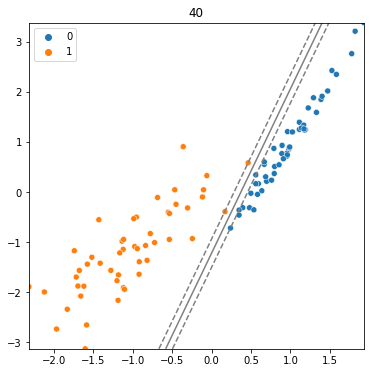

In [7]:
cost = 40
model = SVC(kernel = 'linear', C = cost)
model.fit(x,y)
svm_visualize(x, y, model, cost)

### (6) 선형경계로 분류할 수 없는 데이터셋

* 데이터를 생성하고 시각화 해 봅시다.

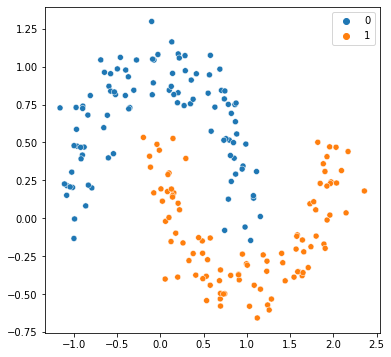

In [8]:
x, y = make_moons(n_samples = 200, noise = .13, random_state = 10)

plt.figure(figsize = (6,6))
sns.scatterplot(x[:,0], x[:,1], hue = y)
plt.show()

* 선형경계로 분류

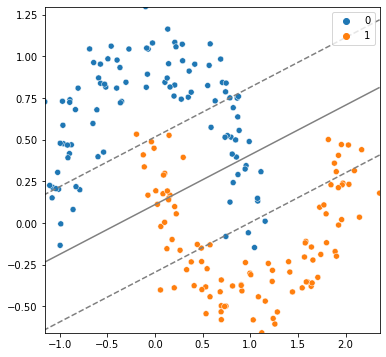

In [9]:
model = SVC(kernel = 'linear')
model.fit(x,y)
svm_visualize(x, y, model)

* 커널 트릭 사용 : rbf

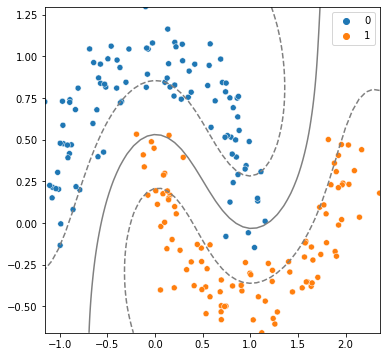

In [10]:
model = SVC(kernel = 'rbf', C = 1)
model.fit(x,y)
svm_visualize(x, y, model)

### (7) 하이퍼파라미터

* Cost : 
    * 오류를 허용하지 않으려는 비용(노력!)
    * 값이 클수록 오류를 허용하지 않기 위한 경계를 만들려고 함.
* gamma : 
    * 결정경계의 곡률
    * 값이 클수록 곡률반경이 작아짐.

* Cost에 따라 결정 경계가 어떻게 달라지는지 살펴 봅시다.

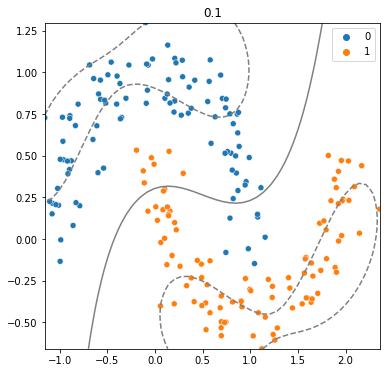

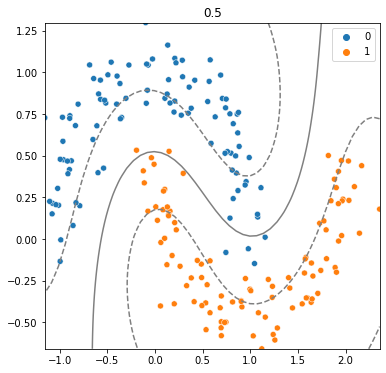

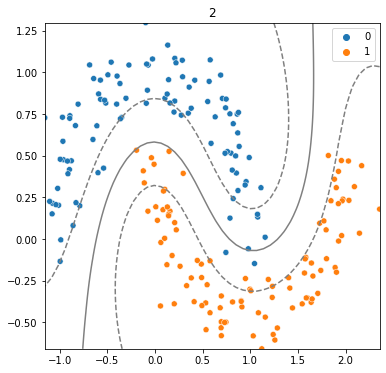

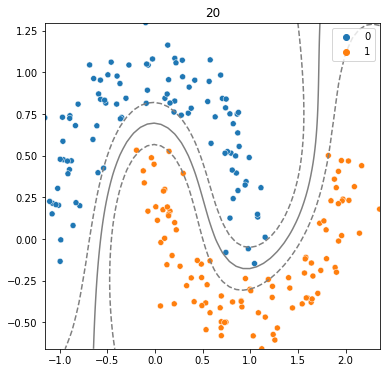

In [11]:
for cost in [0.1, .5, 2, 20] : 
    model = SVC(kernel = 'rbf', C = cost)
    model.fit(x,y)
    svm_visualize(x, y, model, cost)

* gamma에 따라 결정 경계가 어떻게 달라지는지 살펴 봅시다.

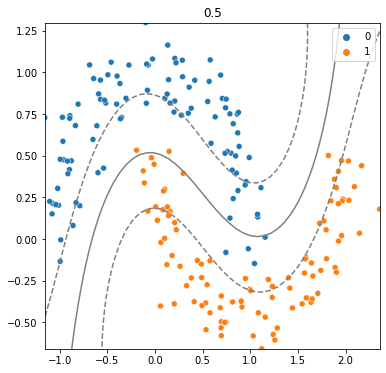

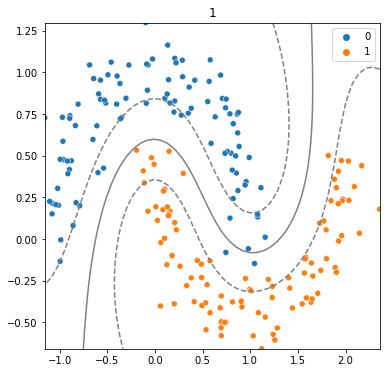

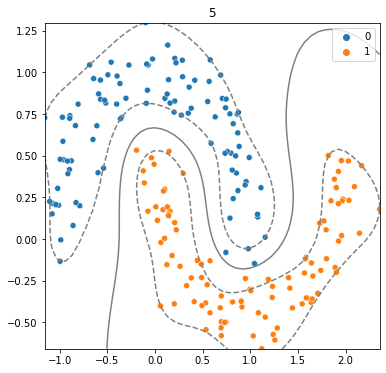

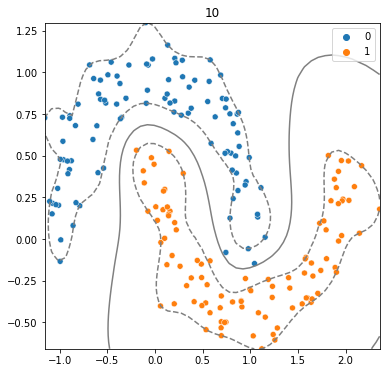

In [12]:
for g in [.5, 1, 5, 10] : 
    model = SVC(kernel = 'rbf', C = 2, gamma =  g)
    model.fit(x,y)
    svm_visualize(x, y, model, g)

## 2.데이터 준비

* 변수설명
    * COLLEGE : 대학 졸업여부
    * INCOME : 연수입
    * OVERAGE : 월평균 초과사용 시간(분)
    * LEFTOVER : 월평균 잔여시간비율(%)
    * HOUSE : 집값
    * HANDSET_PRICE : 스마트폰 가격
    * OVER_15MINS_CALLS_PER_MONTH : 월평균 장기통화(15분이상) 횟수
    * AVERAGE_CALL_DURATION : 평균 통화 시간
    * REPORTED_SATISFACTION : 만족도 설문조사 결과
    * REPORTED_USAGE_LEVEL : 사용도 자가진단 결과
    * CONSIDERING_CHANGE_OF_PLAN : 향후 변경계획 설문조사 결과
    * CHURN : 이탈(번호이동) 여부 (Target 변수)


In [4]:
# 데이터를 불러옵시다.
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/mobile_cust_churn.csv'
data = pd.read_csv(path)
data = data.sample(5000, random_state = 2022)

### (1) 데이터 정리

In [5]:
drop_cols = ['id']
data.drop(drop_cols, axis = 1, inplace = True )

### (2) 데이터분할1 : x, y 나누기

In [6]:
target = 'CHURN'
x = data.drop(target, axis = 1)
y = data.loc[:, target]

### (3) NA 조치

### (4) 가변수화

In [7]:
dumm_cols = ['REPORTED_SATISFACTION','REPORTED_USAGE_LEVEL','CONSIDERING_CHANGE_OF_PLAN']
x = pd.get_dummies(x, columns = dumm_cols, drop_first = True)

### (5) 데이터분할2 : train : validation 나누기

In [8]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = .3, random_state = 2022)

### (6) Scaling

In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

## 3.모델링

### (1) 필요한 함수 불러오기

* SVM
    * SVC : 분류
    * SVR : 회귀

In [10]:
# 모델링을 위해
from sklearn.svm import SVC

# 평가를 위해.
from sklearn.metrics import *

### (2) 선언

In [11]:
model = SVC()

### (3) 모델링(학습)

In [12]:
model.fit(x_train, y_train)

SVC()

### (4) 검증 : 예측

In [13]:
pred = model.predict(x_val)

### (5) 검증 : 평가

* confusion matrix

In [14]:
confusion_matrix(y_val, pred)

array([[436, 295],
       [204, 565]], dtype=int64)

* classification report

In [15]:
print(classification_report(y_val, pred))

              precision    recall  f1-score   support

       LEAVE       0.68      0.60      0.64       731
        STAY       0.66      0.73      0.69       769

    accuracy                           0.67      1500
   macro avg       0.67      0.67      0.66      1500
weighted avg       0.67      0.67      0.67      1500



## 4.실습 : C와 gamma를 조절하며 모델링 하기

In [20]:
cost = range(5, 21, 5) 
c1 = []
for c in cost: 
    model = SVC(C = c)
    model.fit(x_train,y_train)
    p = model.predict(x_val)
    c1.append( f1_score(y_val, p, pos_label='LEAVE') )

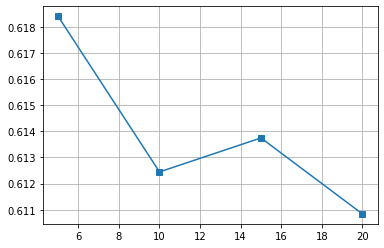

In [21]:
plt.plot(cost, c1, marker = 's')
plt.grid()
plt.show()

In [22]:
gamma = np.linspace(0.1, 1, 5)
g1 = []
for g in gamma: 
    model = SVC(gamma =  g)
    model.fit(x_train,y_train)
    p = model.predict(x_val)
    g1.append( f1_score(y_val, p, pos_label='LEAVE') )

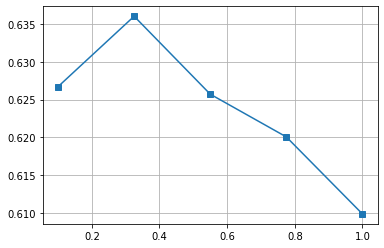

In [23]:
plt.plot(gamma, g1, marker = 's')
plt.grid()
plt.show()